### Import libary and Google Drive access

In [2]:
!pip install pillow

In [3]:
!pip install pyheif

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 9.5 MB/s eta 0:00:00


In [4]:
import pyheif
from PIL import Image
import os
import io
import matplotlib.pyplot as plt

In [5]:
# Give access to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Determine photo extension

In [8]:
def check_photo_type(path):
  # Define the folder path containing the images
  folder_path = path

  # Image types
  image_types = set()

  # Scan the folder and add the file extensions to the set
  for filename in os.listdir(folder_path):
      ext = os.path.splitext(filename)[1].lower()
      if ext not in image_types:
          image_types.add(ext)

  # Print the unique image types
  print("Unique image types in the folder:")
  for img_type in image_types:
      print(img_type)

In [12]:
# Anchorage
folder_path = '/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Fairbanks'
check_photo_type(folder_path)

Unique image types in the folder:

.heic
.png
.jpg


### Compress photo function

In [29]:
def compress_image_to_target(input_image_path, output_folder, target_size_kb, format='JPEG'):
    base_name = os.path.splitext(os.path.basename(input_image_path))[0]
    output_image_path = os.path.join(output_folder, f"{base_name}.{format.lower()}")

    ext = os.path.splitext(os.path.basename(input_image_path))[1].lower()
    if ext == ".heic":
      heif_file = pyheif.read(input_image_path)
      img = Image.frombytes(heif_file.mode, heif_file.size, heif_file.data, "raw", heif_file.mode, heif_file.stride)
    else:
      img = Image.open(input_image_path)

    # Convert RGBA to RGB if necessary
    if img.mode == 'RGBA':
      img = img.convert('RGB')

    quality = 90  # Starting quality
    step = 5      # Step size for quality adjustment
    min_quality = 10  # Minimum quality to prevent infinite loops

    # Save the image at the initial quality and check the file size
    img.save(output_image_path, format, quality=quality)
    while os.path.getsize(output_image_path) > target_size_kb * 1024 and quality > min_quality:
        quality -= step
        img.save(output_image_path, format, quality=quality)

    final_size = os.path.getsize(output_image_path)
    #print(f"Image saved with quality {quality} and size {final_size} bytes")

In [32]:
def compress_image_folder(input_folder, output_folder, target_size_kb, format='JPEG'):
  # Create the output folder if it doesn't exist
  if not os.path.exists(output_folder):
    os.makedirs(output_folder)
  # Supported image file extensions
  supported_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.heic']

  for filename in os.listdir(input_folder):
    input_image_path = input_folder + "/" + filename
    ext = os.path.splitext(filename)[1].lower()

    if ext in supported_extensions:
      try:
        compress_image_to_target(input_image_path, output_folder, target_size_kb, format)
      except Exception as e:
        print(f"Error processing {filename}: {e}")

In [31]:
compress_image_folder('/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Anchorage',
                      "/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/DestinationImg/Anchorage", 500)

/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Anchorage/IMG_4774.heic
/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Anchorage/IMG_4776.heic
/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Anchorage/IMG_4778.heic
/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Anchorage/IMG_4779.heic
/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Anchorage/IMG_4780.heic
/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Anchorage/IMG_4781.heic
/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Anchorage/IMG_4782.heic
/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Anchorage/IMG_4783.heic
/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Anchorage/IMG_4784.heic
/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Anchorage/IMG_4788.PNG
/content/dr

In [33]:
compress_image_folder('/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Palmer',
                      "/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/DestinationImg/Palmer", 500)

In [34]:
compress_image_folder('/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Fairbanks',
                      "/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/DestinationImg/Fairbanks", 500)

### Test pyheif library

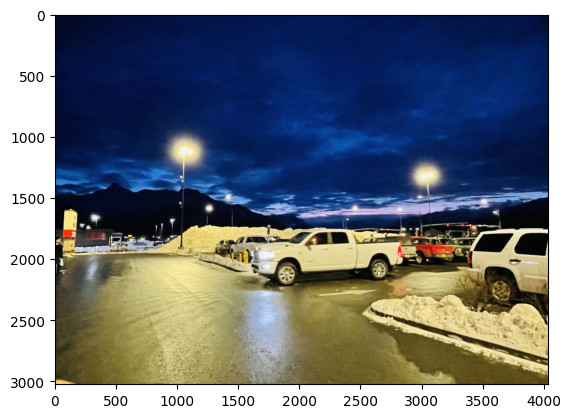

In [ ]:
heif_file = pyheif.read('/content/drive/My Drive/Data-Project/WebDevelop/FinalProjectTest/OriginImg/Palmer.heic')
image = Image.frombytes(
    heif_file.mode,
    heif_file.size,
    heif_file.data,
    "raw",
    heif_file.mode,
    heif_file.stride,
)
plt.imshow(image)

### Not Work Method

In [ ]:
# Not Effective

# def compress_image_to_target(input_image_path, output_folder, target_size_kb, format='JPEG'):
#     base_name = os.path.splitext(os.path.basename(input_image_path))[0]
#     output_image_path = os.path.join(output_folder, f"{base_name}.{format.lower()}")

#     heif_file = pyheif.read(input_image_path)
#     image = Image.frombytes(
#         heif_file.mode,
#         heif_file.size,
#         heif_file.data,
#         "raw",
#         heif_file.mode,
#         heif_file.stride,
#     )
#     img = image

#     quality = 90  # Starting quality
#     step = 5      # Step size for quality adjustment
#     min_quality = 10  # Minimum quality to prevent infinite loops

#     temp_buffer = io.BytesIO()

#     # Initially save to a buffer
#     img.save(temp_buffer, format, quality=quality)
#     while temp_buffer.tell() > target_size_kb * 1024 and quality > min_quality:
#         quality -= step
#         temp_buffer.seek(0)
#         img.save(temp_buffer, format, quality=quality)

#     # Save the final image
#     with open(output_image_path, 'wb') as f_out:
#         f_out.write(temp_buffer.getbuffer())

#     img.save(output_image_path, format, quality=quality)

#     print(f"Image saved with quality {quality} and size {temp_buffer.tell()} bytes")
#     print(f"Image saved with quality {quality} and size {os.path.getsize(output_image_path)} bytes")